In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def cosine_schedule_with_warmup(curr_epoch):
    global epochs
    lr_start = 1e-4
    lr_max = 1e-2
    lr_min = 1e-6
    num_warmup_steps = 20
    num_keep_lr_max_steps = 10
    num_keep_lr_min_steps = 10

    # linear warmup
    if curr_epoch < num_warmup_steps:
        lr = (lr_max - lr_min) / num_warmup_steps * curr_epoch + lr_start

    # keep lr_max
    elif num_warmup_steps <= curr_epoch < num_warmup_steps + num_keep_lr_max_steps:
        lr = lr_max

    # start cosine decay
    # after decay_steps, keep lr_min
    else:
        decay_steps = epochs - num_warmup_steps - num_keep_lr_max_steps - num_keep_lr_min_steps
        cosine_decay = tf.keras.optimizers.schedules.CosineDecay(initial_learning_rate=lr_max,
                                                                 decay_steps=decay_steps,
                                                                 alpha=lr_min / lr_max,
                                                                 )
        lr = cosine_decay(curr_epoch - num_warmup_steps - num_keep_lr_max_steps).numpy()

    return lr

In [3]:
epochs = 100
scheduler = tf.keras.callbacks.LearningRateScheduler(cosine_schedule_with_warmup, verbose=1)

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reduce training data for quick demonstration.
x_train = x_train[:1024]
x_test = x_test[:1024]
y_train = y_train[:1024]
y_test = y_test[:1024]

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics='accuracy')

history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=128,
                    callbacks=scheduler,
                    validation_split=0.2,
                    verbose=1,
                    )

2022-03-27 12:18:14.892994: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-27 12:18:14.893273: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-27 12:18:14.998456: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1

Epoch 00001: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/100
1/7 [===>..........................] - ETA: 1s - loss: 8.3182 - accuracy: 0.0859

2022-03-27 12:18:15.138217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 29ms/step - loss: 8.1300 - accuracy: 0.1087 - val_loss: 8.8506 - val_accuracy: 0.0829 - lr: 1.0000e-04

Epoch 00002: LearningRateScheduler setting learning rate to 0.0005999500000000001.
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 6.3150 - accuracy: 0.1477 - val_loss: 5.5782 - val_accuracy: 0.1610 - lr: 5.9995e-04

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010999000000000002.
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 4.5056 - accuracy: 0.1562

2022-03-27 12:18:15.409319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 13ms/step - loss: 4.2022 - accuracy: 0.2589 - val_loss: 3.9899 - val_accuracy: 0.3659 - lr: 0.0011

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015998500000000003.
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 3.1306 - accuracy: 0.4261 - val_loss: 3.3148 - val_accuracy: 0.4098 - lr: 0.0016

Epoch 00005: LearningRateScheduler setting learning rate to 0.0020998.
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 2.6724 - accuracy: 0.4860 - val_loss: 3.0576 - val_accuracy: 0.4390 - lr: 0.0021

Epoch 00006: LearningRateScheduler setting learning rate to 0.00259975.
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 2.1131 - accuracy: 0.5556 - val_loss: 2.5039 - val_accuracy: 0.4585 - lr: 0.0026

Epoch 00007: LearningRateScheduler setting learning rate to 0.0030997000000000004.
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 1.3472 - accurac

In [5]:
lr_history = history.history['lr']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


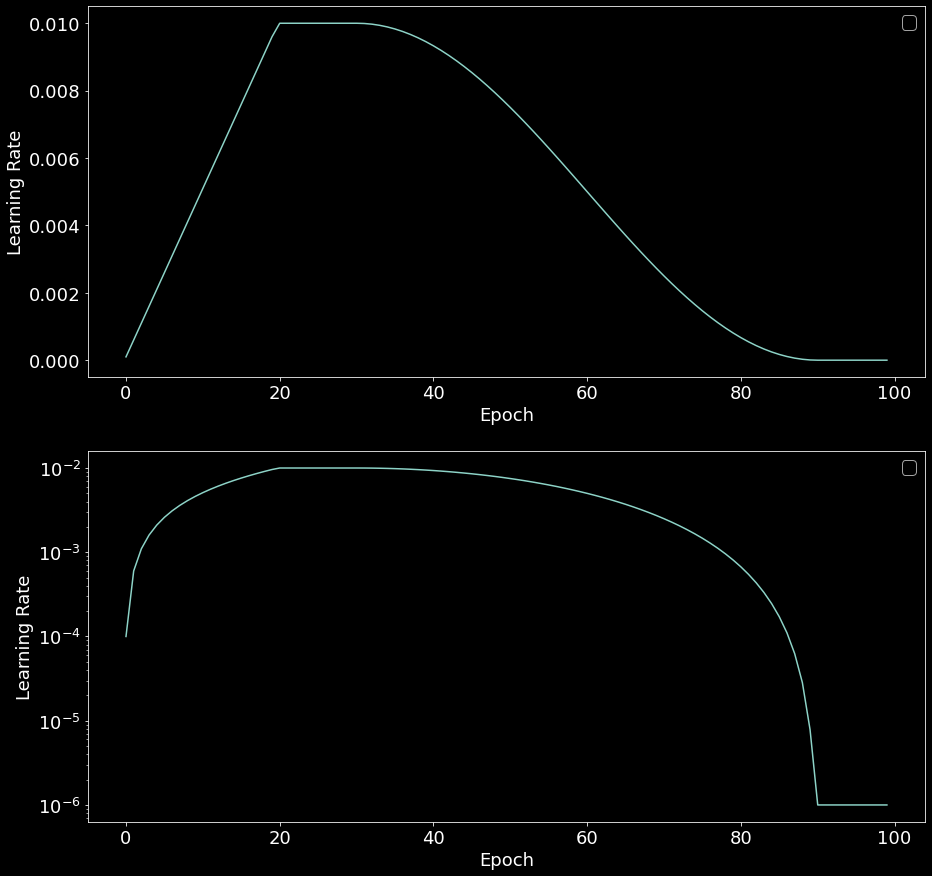

In [6]:
plt.style.use('dark_background')

plt.rcParams["font.size"] = 18

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[15, 15])

ax1.plot(lr_history)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Learning Rate')
ax1.legend()

ax2.plot(lr_history)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Learning Rate')
ax2.set_yscale('log')
ax2.legend()

plt.show()
fig.savefig('figure.png')

### You can see...
 - linear warmup
 - plateau steps of lr_max / lr_min
 - cosine decay